In [188]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

ames_raw = pd.read_csv('Ames_HousePrice.csv', index_col=0)
ames_raw.shape

(2580, 81)

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
ames_raw.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [145]:
#Simple Linear Regression, fit simple linear model for every variable

#col = 'SaleCondition' #I manually looped these to catch errors individually as they came up.

#y = ames_raw[['SalePrice']]
#reg = LinearRegression()

#X = ames_raw[[col]]
    
#reg.fit(X, y)
#print(f" {col}: {reg.score(X, y)}")

PID: 0.05120099648251408  
!GrLivArea: 0.5183732056699006  
MSSubClass: 0.007155008656742345  
MSZoning: VE  
'LotFrontage': NaN's  
'LotArea': .07531921127368835  
Street: VE  
Alley: VE  
'LotShape': VE  
'LandContour': VE  
'Utilities': VE  
'LotConfig': VE  
'LandSlope': VE  
'Neighborhood': VE  
'Condition1': VE  
'Condition2': VE  
'BldgType': VE  
'HouseStyle': VE  
!! OverallQual: 0.6248925373371652  
OverallCond: 0.010219487984851061  
YearBuilt: 0.2963386692622052  
YearRemodAdd: 0.2645135075446048  
'RoofStyle': VE  
'RoofMatl': VE  
'Exterior1st': VE  
'Exterior2nd': VE  
'MasVnrType': VE  
'ExterQual': VE  
'ExterCond': VE  
'Foundation': VE  
'BsmtQual': VE  
'BsmtCond': VE  
'BsmtExposure': VE  
'BsmtFinType1': VE  
'BsmtFinSF1': NaN's
'BsmtFinType2': VE  
'BsmtFinSF2': NaN's
'BsmtUnfSF': NaN's
'TotalBsmtSF': NaN's
'Heating': VE  
'HeatingQC': VE  
'CentralAir': VE  
'Electrical': VE  
 1stFlrSF: 0.4129516427126516  
 2ndFlrSF: 0.06924468617633406  
 LowQualFinSF: 0.00095079438633483  
 'BsmtFullBath': NaN's
 'BsmtHalfBath': NaN's
 FullBath: 0.28620549197746115
 HalfBath: 0.08172451792098179
 BedroomAbvGr: 0.02304512827536065
 KitchenAbvGr: 0.01299070277321901
 'KitchenQual': VE  
 TotRmsAbvGrd: 0.24031508853002137
 'Functional': VE  
Fireplaces: 0.23832326199307086
'FireplaceQu': VE  
'GarageType': VE  
'GarageYrBlt': NaN's
'GarageFinish': VE  
'GarageCars': NaN's
'GarageArea': NaN's
'GarageQual': VE
'GarageCond': VE
'PavedDrive': VE
WoodDeckSF: 0.11104333043218384
OpenPorchSF: 0.09396687512928903
EnclosedPorch: 0.015186832015373852
3SsnPorch: 0.0009771955140200905
ScreenPorch: 0.01475335746883455
PoolArea: 0.0009513780180608888
'PoolQC': VE
'Fence': VE
'MiscFeature': VE
MiscVal: 0.0003563384769366129
MoSold: 0.00015852081570277843
YrSold: 1.8925326150665e-06
'SaleType': VE
'SaleCondition': VE


## First pass- reporting top R^2's: 
OverallQual: 0.6248925373371652 -- I am gravely concerned about this column. 'Overall Quality' is feature engineering already built into the dataset- a subjective human metric that would be incredibly difficult to keep consistent and evaluate over time. Not to mention its distribution, which is heavily weighted so that the majority of the homes are 'above average'. I can't deny its predictive power, but it's fishy to me and I suspect it would receive a lot of scrutiny in a professional setting. I bristle at the presentations where students report that to make a house cost more, you have to increase square footage and its 'overall quality'- which feels like a cop-out.

GrLivArea (above grade living area with R^2 of .5183732056699006)  
1stFlrSF: 0.4129516427126516  
YearBuilt: 0.2963386692622052  
FullBath: 0.28620549197746115  
YearRemodAdd: 0.2645135075446048  

In [146]:
#Look at columns- can drop in 'MSSubClass' too

y2 = ames_raw[['SalePrice']]
reg2 = LinearRegression()

for col in ames_raw.drop(columns = ['PID', 'SalePrice']).columns:

    if str(ames_raw[col].dtype) == 'object':

        x = ames_raw[[col]]
     
        x = pd.get_dummies(x, columns = [col], drop_first=True) #vs drop_first=False changes these values?
        
        x = x.replace({False: 0, True: 1})
        
        reg2.fit(x, y)
        
        print(f" {col}: {reg2.score(x, y2)}")

    else:
        pass

 MSZoning: 0.11600712743510999
 Street: 0.0025456399344537806
 Alley: 1.1122790402051663e-06
 LotShape: 0.09415497298779363
 LandContour: 0.03234993583246448
 Utilities: 0.0011604270772369585
 LotConfig: 0.021107163245754457
 LandSlope: 0.0063239454783983184
 Neighborhood: 0.5598077663859118
 Condition1: 0.04531604555423885
 Condition2: 0.024720008929335457
 BldgType: 0.03303709816401801
 HouseStyle: 0.07103279739739266
 RoofStyle: 0.05870948148127286
 RoofMatl: 0.020763632343995697
 Exterior1st: 0.15513439019561037
 Exterior2nd: 0.15380427767670357
 MasVnrType: 0.17102556348836406
 ExterQual: 0.4853009289061254
 ExterCond: 0.021968757422164087
 Foundation: 0.26713508906430017
 BsmtQual: 0.3162074986324529
 BsmtCond: 0.04840595199785991
 BsmtExposure: 0.14879901006583107
 BsmtFinType1: 0.21719133838158222
 BsmtFinType2: 0.017428007577154014
 Heating: 0.007934972875623836
 HeatingQC: 0.20235536653584862
 CentralAir: 0.06642840369204306
 Electrical: 0.0564879727663965
 KitchenQual: 0.457

In [147]:
x = ames_raw[['MSSubClass']]
     
x = pd.get_dummies(x, columns = ['MSSubClass'], drop_first=False)
        
x = x.replace({False: 0, True: 1})
        
reg2.fit(x, y)
        
print(f" 'MSSubClass': {reg2.score(x, y2)}")

 'MSSubClass': 0.2398439674330033


Of the non-numerical columns:   
 Neighborhood: 0.5597828887109129  
 ExterQual: 0.48500289777659467  
 BsmtQual: 0.4813818328427477  
 KitchenQual: 0.45734015822742424  

## *Columns with Missing Values (all numerical):*  
'LotFrontage'  
'BsmtFinSF1'   
'BsmtFinSF2'   
'BsmtUnfSF'   
'TotalBsmtSF'   
'BsmtFullBath'   
'BsmtHalfBath'   
'GarageYrBlt'   
'GarageCars'   
'GarageArea'  

### LotFrontage

In [189]:
#462 Rows with 'LotFrontage' NaNs

missingmask = ames_raw[ames_raw['LotFrontage'].isna()]
len(missingmask)

lot_traits = ['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour', 'LotConfig']

for col in lot_traits:
    print(missingmask[col].value_counts(normalize=True))

#I don't see a compelling overall trend for buildings sold with missing 'LotFrontage' values.
#Missing Completely at Random? Is it possible to have a home without any lotfrontage?

MSSubClass
20    0.3701
60    0.2771
120   0.0714
80    0.0649
50    0.0519
90    0.0368
85    0.0325
160   0.0281
30    0.0260
70    0.0216
190   0.0087
75    0.0043
40    0.0022
180   0.0022
150   0.0022
Name: proportion, dtype: float64
MSZoning
RL        0.8701
RM        0.0758
FV        0.0411
RH        0.0087
I (all)   0.0022
C (all)   0.0022
Name: proportion, dtype: float64
LotArea
7500     0.0108
4426     0.0087
11000    0.0087
11250    0.0087
7750     0.0087
11500    0.0065
2117     0.0065
9000     0.0065
4435     0.0065
6240     0.0043
11075    0.0043
8544     0.0043
7758     0.0043
4928     0.0043
12342    0.0043
9375     0.0043
3072     0.0043
9819     0.0043
11050    0.0043
8750     0.0043
8125     0.0043
9240     0.0043
3940     0.0043
9790     0.0043
4438     0.0043
8239     0.0043
11616    0.0043
12155    0.0043
17871    0.0043
11200    0.0043
3196     0.0043
8010     0.0043
5700     0.0043
5100     0.0022
8076     0.0022
9610     0.0022
24682    0.0022
2665     0.0022
7

In [190]:
pd.set_option('display.max_columns', None)

neighborhood_mean_frontage = ames_raw.groupby('Neighborhood')['LotFrontage'].mean()

ames_raw['LotFrontage'] = ames_raw.apply(
    lambda row: neighborhood_mean_frontage[row['Neighborhood']] if\
    pd.isna(row['LotFrontage']) else row['LotFrontage'], axis = 1)
    
missingmask = ames_raw[ames_raw['LotFrontage'].isna()]
print(missingmask)

#These last remaining values are missing because there is no lot frontage recorded
#in these neighborhoods for us to take the average frontage!

#Impute the last three with mean
ames_raw['LotFrontage'] = ames_raw['LotFrontage'].fillna(ames_raw['LotFrontage'].mean())

           PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
110  916253320       1502     330000         120       RM          NaN   
684  916252170       1295     230000         120       RM          NaN   
205  907230240       1320     137000         160       RH          NaN   

     LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
110     9763   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
684     8239   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
205     3612   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
110      GrnHill       Norm       Norm   TwnhsE     1Story            7   
684      GrnHill       Norm       Norm   TwnhsE     1Story            7   
205      Landmrk       Norm       Norm    Twnhs     2Story            6   

     OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
110  

In [150]:
y = ames_raw[['SalePrice']]
reg = LinearRegression()

X = ames_raw[['LotFrontage']]
    
reg.fit(X, y)
print(f" 'LotFrontage': {reg.score(X, y)}")
#imputing by neighborhood instead of imputing across the whole dataset brought the R^2 up\
#from .114 to .124 :\

 'LotFrontage': 0.12408330972516857


## 'Basement Square Footage'

In [191]:
mask = ames_raw['BsmtFinSF1'].isna()

ames_raw.loc[mask, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = (0, 0, 0, 0)

#Observations with Nans in 'BsmtFinSF1' don't have basements: Impute with 0's

In [192]:
y = ames_raw[['SalePrice']]
reg = LinearRegression()

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    X = ames_raw[[col]]
    
    reg.fit(X, y)
    print(f"{col}: {reg.score(X, y)}")

#TotalBsmtSF!

BsmtFinSF1: 0.21258570280531774
BsmtFinSF2: 0.0005138356647375053
BsmtUnfSF: 0.028244021234264394
TotalBsmtSF: 0.42574893740677966


## Basement Bathrooms

In [193]:
mask = ames_raw['BsmtFullBath'].isna()

ames_raw[mask]
ames_raw.loc[mask, ['BsmtFullBath', 'BsmtHalfBath']] = (0, 0)

#NaN's for Full Bathrooms in Basement? It's because they don't have a basement. Impute 0's

In [194]:
y = ames_raw[['SalePrice']]
reg = LinearRegression()

for col in ['BsmtFullBath', 'BsmtHalfBath']:
    X = ames_raw[[col]]
    
    reg.fit(X, y)
    print(f"{col}: {reg.score(X, y)}")

BsmtFullBath: 0.08453860463050078
BsmtHalfBath: 0.0011414971693050058


## Garage

In [155]:
'GarageYrBlt'
'GarageCars'
'GarageArea'

'GarageArea'

In [195]:
missingmask = ames_raw[ames_raw['GarageYrBlt'].isna()]
missingmask[missingmask['GarageType'] != 'No Garage']
mask = (ames_raw['PID'] == 910201180)

ames_raw.loc[mask, ['GarageYrBlt', 'GarageArea']] = (ames_raw['GarageYrBlt'].mean(), ames_raw['GarageArea'].mean())

mask = (ames_raw['PID'] == 903426160)

ames_raw.loc[mask, 'GarageYrBlt'] = (ames_raw['GarageYrBlt'].mean())
#All remaining 'GarageYrBlt' NaNs are for houses without garages. Impute with 0 to retain data type of column
#ames_raw['GarageYrBlt'].isna()
ames_raw['GarageYrBlt'] = ames_raw['GarageYrBlt'].fillna(0)

In [196]:
ames_raw['GarageCars'] = ames_raw['GarageCars'].fillna(value = 0.0)

In [197]:
y = ames_raw[['SalePrice']]
reg = LinearRegression()

for col in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    X = ames_raw[[col]]
    
    reg.fit(X, y)
    print(f"{col}: {reg.score(X, y)}")

GarageYrBlt: 0.06073326732327766
GarageCars: 0.4075857726993316
GarageArea: 0.40319406184284


# R^2 from Simple Linear Regression: Top Ten

*1*. OverallQual: 0.6248925373371652 -- I am gravely concerned about this column. 'Overall Quality' is feature engineering already built into the dataset- a subjective human metric that would be incredibly difficult to evaluate consistently over time. How would different assessors rate a home on this metric? Not to mention its distribution, which is heavily weighted so that the majority of the homes are 'above average'. I can't deny its predictive power, but it's fishy to me and I suspect it would receive a lot of scrutiny in a professional setting. I bristle at the presentations where students report that to raise the asking price of your house, you have to increase square footage and its 'overall quality'- which feels like a cop-out.

*2*. Neighborhood: 0.5597828887109129  
*3*. GrLivArea: .5183732056699006  
*4*. ExterQual: 0.48500289777659467  
*5*. BsmtQual: 0.4813818328427477  
*6*. KitchenQual: 0.45734015822742424  
*7*. TotalBsmtSF: 0.42574893740677966  
*8*. 1stFlrSF: 0.4129516427126516  
*9*. GarageCars: 0.4075857726993316  
*10*.GarageArea: 0.40319406184284 (obviously highly correlated with GarageCars!)

## Clean up Missing Values

In [159]:
ames_raw.columns[ames_raw.isna().any()].tolist()

['Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [198]:
#Alley
ames_raw['Alley'] = ames_raw['Alley'].fillna('No Alley')

In [161]:
#Filter to where 'MasVnrType' is null and 'MasVnrArea' is NOT null:
missingmask = ames_raw[ames_raw['MasVnrType'].isna()]
missingmask[pd.notna(missingmask['MasVnrArea']) & missingmask['MasVnrArea'] != 0]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
115,534129230,1790,165150,60,RL,80.0000,10400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0000,TA,TA,CBlock,TA,TA,No,Rec,247.0000,Unf,0.0000,485.0000,732.0000,GasA,Gd,Y,SBrkr,1012,778,0,1.0000,0.0000,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0000,RFn,2.0000,484.0000,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,Normal
604,528138010,1808,324000,20,RL,102.0000,13514,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,NaN,285.0000,Ex,TA,PConc,Ex,TA,No,GLQ,1142.0000,Unf,0.0000,632.0000,1774.0000,GasA,Ex,Y,SBrkr,1808,0,0,1.0000,0.0000,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0000,Fin,3.0000,850.0000,TA,TA,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
138,535106140,912,114500,20,RL,70.0000,10150,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0000,TA,TA,CBlock,TA,TA,No,Rec,456.0000,Unf,0.0000,456.0000,912.0000,GasA,Ex,Y,FuseA,912,0,0,0.0000,0.0000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0000,RFn,1.0000,275.0000,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal
231,527451110,1365,125000,160,RM,24.0000,2368,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0000,TA,TA,CBlock,TA,TA,No,LwQ,765.0000,Unf,0.0000,0.0000,765.0000,GasA,TA,Y,SBrkr,765,600,0,0.0000,0.0000,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0000,Unf,2.0000,440.0000,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
177,527166010,1983,225000,60,RL,73.3626,10762,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0000,Gd,TA,PConc,Gd,TA,No,GLQ,694.0000,Unf,0.0000,284.0000,978.0000,GasA,Ex,Y,SBrkr,1005,978,0,0.0000,0.0000,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0000,Fin,2.0000,490.0000,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
284,902427140,968,104500,20,RM,52.0000,8626,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,NaN,1.0000,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,GasA,Gd,Y,SBrkr,968,0,0,0.0000,0.0000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0000,Unf,1.0000,331.0000,Fa,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
290,533352075,2620,190000,90,RL,75.3889,18890,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0000,TA,TA,CBlock,Gd,TA,No,GLQ,498.0000,Rec,211.0000,652.0000,1361.0000,GasA,Ex,Y,SBrkr,1361,1259,0,0.0000,0.0000,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0000,RFn,2.0000,600.0000,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal


In [199]:
#Where masonry is 1 sq ft? Remove, replace with 0
mask1 = (ames_raw['MasVnrType'].isna()) & (ames_raw['MasVnrArea'].notna()) & (ames_raw['MasVnrArea'] == 1)
ames_raw.loc[mask1, ['MasVnrType', 'MasVnrArea']] = ('No MasVnr', 0)

In [200]:
#Where masonry is more than 1 sq ft? Retain, Impute MasVnrType with mode: 'BrkFace'
mask2 = (ames_raw['MasVnrType'].isna()) & (ames_raw['MasVnrArea'].notna()) & (ames_raw['MasVnrArea'] != 0)
ames_raw.loc[mask2, 'MasVnrType'] = 'BrkFace'

In [201]:
ames_raw['MasVnrType'] = ames_raw['MasVnrType'].fillna(value = 'No MasVnr')

In [202]:
#MasVnrArea
missingmask = ames_raw[ames_raw['MasVnrArea'].isna()]
missingmask
#Masonry Veneer Area is Nan in these columns because 'MasVnrType' is exclusively 'None': Impute 0's

ames_raw['MasVnrArea'] = ames_raw['MasVnrArea'].fillna(0)

### Basement Values

In [203]:
mask = (ames_raw['BsmtQual'].isna() & ames_raw['BsmtFinSF1'].notna())
ames_raw.loc[mask, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = ('No Bsmt', 'No Bsmt',\
                                                                                              'No Bsmt', 'No Bsmt', 'No Bsmt')

In [204]:
missingmask = ames_raw['BsmtQual'].isna()

ames_raw.loc[missingmask, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = ('No Bsmt', 'No Bsmt',\
                                                                                              'No Bsmt', 'No Bsmt', 'No Bsmt')

In [205]:
mask = ames_raw['BsmtExposure'].isna()
ames_raw.loc[mask, 'BsmtExposure'] = 'No'

In [206]:
mask = ames_raw['BsmtFinType2'].isna()
ames_raw.loc[mask, ['BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF']] = ('Unf', 479.0, 1603.0)

### Electrical

In [207]:
ames_raw['Electrical'] = ames_raw['Electrical'].fillna(value = 'SBrkr')

### Fireplace

In [208]:
mask = ames_raw['FireplaceQu'].isna()
ames_raw.loc[mask, 'FireplaceQu'] = 'No Fireplace'

### Garage

In [209]:
missingmask = ames_raw['GarageType'].isna()
ames_raw.loc[missingmask, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] =\
    ('No Garage', 'No Garage', 'No Garage', 'No Garage')
#Where GarageType is NaN, all other Garage Attributes are 0 or NaN

In [210]:
mask = (ames_raw['PID'] == 910201180)

ames_raw.loc[mask, ['GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']] =\
    ('Unf', 1, 'TA', 'TA')

In [211]:
mask = (ames_raw['PID'] == 903426160)

ames_raw.loc[mask, ['GarageFinish', 'GarageQual', 'GarageCond']] =\
    ('Unf', 'TA', 'TA')

### PoolQC, MiscFeature, Fence

In [212]:
mask = ames_raw['PoolQC'].isna() & ames_raw['PoolArea'].notna() & (ames_raw['PoolArea'] != 0)
ames_raw[mask]
#If PoolQC is missing, the square footage is listed as 0, safe to impute with 'None'

ames_raw['PoolQC'] = ames_raw['PoolQC'].fillna('No Pool')

In [213]:
mask = ames_raw['MiscFeature'].isna() & ames_raw['MiscVal'].notna() & (ames_raw['MiscVal'] != 0)
ames_raw[mask]

#If MiscFeature is missing, there are no dangling 'MiscVal' values to complicate imputing with 'None'

ames_raw['MiscFeature'] = ames_raw['MiscFeature'].fillna('No Misc')

In [214]:
ames_raw['Fence'] = ames_raw['Fence'].fillna('No Fence')

## Implement Train-Test Split

In [218]:
ames = ames_raw.copy()

In [219]:
ames

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,58.7692,7890,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,No MasVnr,0.0000,TA,TA,CBlock,TA,TA,No,Rec,238.0000,Unf,0.0000,618.0000,856.0000,GasA,TA,Y,SBrkr,856,0,0,1.0000,0.0000,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0000,Unf,2.0000,399.0000,TA,TA,Y,0,0,0,0,166,0,No Pool,No Fence,No Misc,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0000,4235,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0000,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0000,ALQ,393.0000,104.0000,1049.0000,GasA,TA,Y,SBrkr,1049,0,0,1.0000,0.0000,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1984.0000,Fin,1.0000,266.0000,TA,TA,Y,0,105,0,0,0,0,No Pool,No Fence,No Misc,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0000,6060,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,No MasVnr,0.0000,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0000,Unf,0.0000,100.0000,837.0000,GasA,Ex,Y,SBrkr,1001,0,0,0.0000,0.0000,1,0,2,1,Gd,5,Typ,0,No Fireplace,Detchd,1930.0000,Unf,1.0000,216.0000,TA,Po,N,154,0,42,86,0,0,No Pool,No Fence,No Misc,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0000,8146,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,No MasVnr,0.0000,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0000,Unf,0.0000,405.0000,405.0000,GasA,Gd,Y,SBrkr,717,322,0,0.0000,0.0000,1,0,2,1,TA,6,Typ,0,No Fireplace,Detchd,1940.0000,Unf,1.0000,281.0000,TA,TA,N,0,0,168,0,111,0,No Pool,No Fence,No Misc,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0000,8400,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,No MasVnr,0.0000,Gd,TA,PConc,Gd,TA,No,GLQ,643.0000,Unf,0.0000,167.0000,810.0000,GasA,Ex,Y,SBrkr,810,855,0,1.0000,0.0000,2,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2001.0000,Fin,2.0000,528.0000,TA,TA,Y,0,45,0,0,0,0,No Pool,No Fence,No Misc,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,55.9457,8854,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,No MasVnr,0.0000,TA,TA,BrkTil,TA,TA,No,Unf,0.0000,Unf,0.0000,952.0000,952.0000,Grav,Fa,N,FuseF,952,0,0,0.0000,0.0000,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0000,Unf,1.0000,192.0000,Fa,Po,P,0,98,0,0,40,0,No Pool,No Fence,No Misc,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,65.4901,13680,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,No MasVnr,0.0000,TA,TA,Slab,No Bsmt,No Bsmt,No Bsmt,No Bsmt,0.0000,No Bsmt,0.0000,0.0000,0.0000,GasA,Ex,Y,FuseA,1733,0,0,0.0000,0.0000,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0000,Unf,2.0000,452.0000,TA,T

In [220]:
#But first, a little feature engineering.

ames['TotalBath'] = ames['BsmtFullBath'] + ames['FullBath'] +\
                       (ames.BsmtHalfBath * .5) + (ames.HalfBath * .5)

#Total Square Footage: Above Grade + Basement
ames['TotalSF'] = ames['GrLivArea'] + ames['TotalBsmtSF']

#High Quality SF
ames['HQSF'] = ames['TotalSF'] - ames['LowQualFinSF']

#Years Between Remodel and Build
ames['yrsbtwn'] = ames['YearRemodAdd'] - ames['YearBuilt']

In [221]:
import os

current_directory = os.getcwd()

file_path = os.path.join(current_directory, "ames.csv")

ames.to_csv(file_path)

In [38]:
#Implement Train-Test Split: Run a linear regression on every column vs SalePrice and Report R^2

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
pd.set_option('display.max_rows', 100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

cat_cols = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

df_list = []

for col in range(X_train.shape[1]):
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X_train.iloc[:, [col]])
    else:
        transformed_col = X_train.iloc[:, [col]]
    
    X_feature_train, X_feature_test, Y_train, Y_test = train_test_split(transformed_col, y_train, test_size = .2, random_state = 0)
    
    model = LinearRegression()
    model.fit(X_feature_train, Y_train)
    
    Y_pred = model.predict(X_feature_test)
    
    r2 = r2_score(Y_test, Y_pred)
    col_name = X_train.columns[col]
    
    df_list.append([col_name, r2])
    
    df_list = sorted(df_list, key=lambda x: x[1], reverse = True)

    R2_df = pd.DataFrame(df_list, columns = ['Col', 'R2'])
    
R2_df

,Col,R2
0,HQSF,0.701772
1,TotalSF,0.698450
2,OverallQual,0.602340
3,Neighborhood,0.548470
4,ExterQual,0.529352
5,GrLivArea,0.527104
6,KitchenQual,0.468366
7,BsmtQual,0.447437
8,TotalBsmtSF,0.436160
9,1stFlrSF,0.432079


In [103]:
#Repeat Process- get out coefficients and intercept

y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

cat_cols = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

results_list = []



for col in range(X_train.shape[1]):
    df_list = []
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X_train.iloc[:, [col]])
    else:
        transformed_col = X_train.iloc[:, [col]]
    
    X_feature_train, X_feature_test, Y_train, Y_test = train_test_split(transformed_col, y_train, test_size = .2, random_state = 0)
    
    model = LinearRegression()
    model.fit(X_feature_train, Y_train)
    
    Y_pred = model.predict(X_feature_test)
    
    r2 = r2_score(Y_test, Y_pred)
    
    col_name = X_train.columns[col]
    
    df_list.append(col_name)
    
    df_list.append(r2)
    
    coef_flat = model.coef_.flatten().tolist()
    
    df_list.append(coef_flat)
    
    df_list.append(model.intercept_[0])

    results_list.append(df_list)

results_list = sorted(results_list, key=lambda x: x[1], reverse = True)

slr_detailed = pd.DataFrame(results_list, columns = ['feature', 'r2', 'betas', 'intercept'])

slr_detailed

,feature,r2,betas,intercept
0,HQSF,0.7018,[77.21613680254939],-17459.3591
1,TotalSF,0.6985,[77.06908555009133],-17447.8098
2,OverallQual,0.6023,[42212.01016287305],-78116.7427
3,Neighborhood,0.5485,"[-49594.61527449699, -93844.61512463707, -7114...",198094.6170
4,ExterQual,0.5294,"[-276953.8389355737, -137450.13939144128, -219...",365030.3095
5,GrLivArea,0.5271,[105.44839060497975],20199.5611
6,KitchenQual,0.4684,"[-207785.32986111107, -108085.2447584921, 0.0,...",316937.5521
7,BsmtQual,0.4474,"[-207762.92721469887, -116473.39858224175, -20...",316043.4711
8,TotalBsmtSF,0.4362,[114.90786045489672],57672.4489
9,1stFlrSF,0.4321,[123.3473382530574],35520.5966


In [104]:
slr_detailed.loc[0,:]
#By just plotting high quality square footage at a rate of $77.21/ft^2, you can explain about 70% of the saleprices.
#The intercept is a construct for the regression. (226 ft^2 before you're paying $0!)

feature                     HQSF
r2                        0.7018
betas        [77.21613680254939]
intercept            -17459.3591
Name: 0, dtype: object

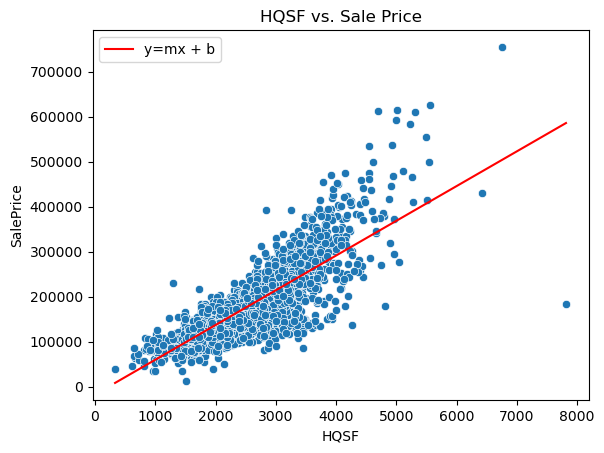

In [46]:
mydf = ames.loc[:, ['HQSF', 'SalePrice']]
sns.scatterplot(data = mydf, x = 'HQSF', y = 'SalePrice')
x_vals = np.linspace(ames[['HQSF']].min(), ames[['HQSF']].max(), 100)
y_vals = 77.21*x_vals + -17459.35
plt.plot(x_vals, y_vals, color='red', label= 'y=mx + b')

plt.title(f"HQSF vs. Sale Price")
plt.legend()
plt.show()

In [47]:
slr_detailed.loc[2,:]
#By just plotting Quality at a rate of $42,212/1 step up in quality, you can explain about 70% of the saleprices.
#The intercept is a construct for the regression. (-$78,116.74 for a '0' quality house?)

feature              OverallQual
r2                       0.60234
betas        [42212.01016287305]
intercept          -78116.742715
Name: 2, dtype: object

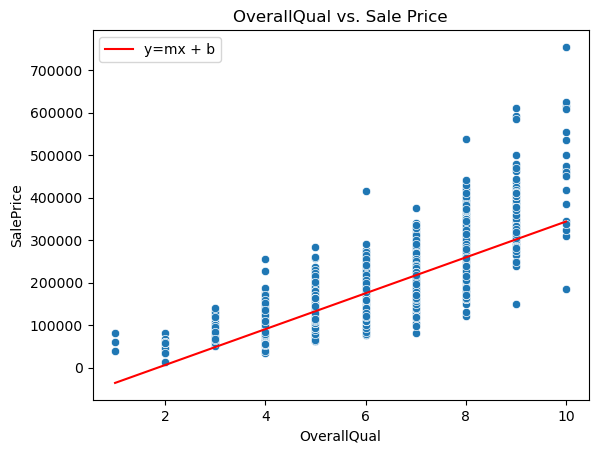

In [48]:
mydf = ames.loc[:, ['OverallQual', 'SalePrice']]
sns.scatterplot(data = mydf, x = 'OverallQual', y = 'SalePrice')
x_vals = np.linspace(ames[['OverallQual']].min(), ames[['OverallQual']].max(), 100)
y_vals = 42212*x_vals + -78116.74
plt.plot(x_vals, y_vals, color='red', label= 'y=mx + b')

plt.title(f"OverallQual vs. Sale Price")
plt.legend()
plt.show()

In [49]:
slr_detailed.loc[3, 'betas']
#df.loc[3, :]
#Neighborhood coefficients--- which of these are significant/have robust enough # of homes?
#We are talking about almost $200K difference here!

[-49594.61527449699,
 -93844.61512463707,
 -71144.97577890745,
 9963.298008158705,
 -4535.2038629650315,
 2105.3859319617577,
 -65968.19086601882,
 -9985.172831017999,
 -6844.615314050307,
 81905.38464371194,
 -90449.01934576307,
 -61094.61537672886,
 -97603.3107150738,
 -37096.696599377894,
 -53352.84143073371,
 -55833.90090578082,
 -5531.389287262127,
 125547.43092849312,
 108626.12736956871,
 -72266.11711478647,
 -65502.614950815376,
 -58583.821069452584,
 -7630.494550128224,
 27248.985002569185,
 111585.24206482976,
 50720.567006123754,
 53558.71815793986]

### Cross-Validation

In [50]:
from sklearn.model_selection import cross_val_score

y = ames[['SalePrice']]
X = ames[['GrLivArea']]
#X = ames.drop(columns = ['PID', 'SalePrice'])

model = LinearRegression()

print(cross_val_score(model, X, y, cv=5))


[0.48839145 0.54118421 0.52138468 0.54578829 0.46720803]


In [105]:
#Implement cross-validation: not sure how to get out coefficients in this situation.
from sklearn.model_selection import cross_val_score
pd.options.display.float_format = '{:.4f}'.format

y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

cat_cols = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

big_list = []

for col in range(X.shape[1]):
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X.iloc[:, [col]])
    else:
        transformed_col = X.iloc[:, [col]]
    
    model = LinearRegression()
    
    col_name = X.columns[col]
    
    df_list = [col_name]
    
    cv_scores = cross_val_score(model, transformed_col, y, cv = 5)
    
    df_list.extend(cv_scores)
    
    df_list.extend([np.mean(cv_scores), np.std(cv_scores)])
    
    big_list.append(df_list)

big_list = sorted(big_list, key = lambda x: x[6], reverse = True)


slr_CV_df = pd.DataFrame(big_list, columns = ['Feature', 'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'Avg', 'Std'])
    
slr_CV_df

,Feature,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,HQSF,0.6698,0.6822,0.7277,0.6595,0.6102,0.6699,0.0379
1,TotalSF,0.6628,0.6797,0.7244,0.6656,0.5969,0.6659,0.0410
2,OverallQual,0.6178,0.6425,0.6178,0.6094,0.6026,0.6180,0.0135
3,Neighborhood,0.5444,0.5741,0.5362,0.5419,0.5062,0.5406,0.0216
4,GrLivArea,0.4884,0.5412,0.5214,0.5458,0.4672,0.5128,0.0305
5,BsmtQual,0.5169,0.5096,0.4386,0.3883,0.4716,0.4650,0.0476
6,ExterQual,0.5460,0.5167,0.4038,0.4313,0.4264,0.4649,0.0559
7,KitchenQual,0.4772,0.5040,0.3819,0.3551,0.4666,0.4369,0.0578
8,TotalBsmtSF,0.5006,0.4278,0.4514,0.3474,0.3149,0.4084,0.0681
9,TotalBath,0.3886,0.4040,0.4241,0.3543,0.4508,0.4044,0.0325


In [106]:
slr_CV_df['Feature']

0              HQSF
1           TotalSF
2       OverallQual
3      Neighborhood
4         GrLivArea
5          BsmtQual
6         ExterQual
7       KitchenQual
8       TotalBsmtSF
9         TotalBath
10       GarageCars
11         1stFlrSF
12       GarageArea
13        YearBuilt
14      FireplaceQu
15         FullBath
16     GarageFinish
17       Foundation
18     YearRemodAdd
19       MasVnrArea
20     TotRmsAbvGrd
21       Fireplaces
22       GarageType
23     BsmtFinType1
24       BsmtFinSF1
25        HeatingQC
26     BsmtExposure
27       MasVnrType
28      Exterior1st
29      Exterior2nd
30      LotFrontage
31         MSZoning
32       WoodDeckSF
33         LotShape
34      OpenPorchSF
35         HalfBath
36       GarageQual
37     BsmtFullBath
38       GarageCond
39       PavedDrive
40         2ndFlrSF
41       CentralAir
42          LotArea
43       HouseStyle
44         SaleType
45      GarageYrBlt
46       Electrical
47    SaleCondition
48          yrsbtwn
49         BsmtCond


In [107]:
slr_CV_toplot = slr_CV_df.iloc[:11,0:6]
slr_CV_toplot2 = slr_CV_df.iloc[11:21, 0:6]
slr_CV_toplot
slr_CV_toplot2

,Feature,Fold1,Fold2,Fold3,Fold4,Fold5
11,1stFlrSF,0.4765,0.4208,0.4072,0.3591,0.3147
12,GarageArea,0.4316,0.3942,0.3863,0.3933,0.3637
13,YearBuilt,0.3093,0.3088,0.2568,0.2534,0.2958
14,FireplaceQu,0.3246,0.3301,0.2656,0.2229,0.2588
15,FullBath,0.2343,0.3195,0.3041,0.2738,0.2620
16,GarageFinish,0.3098,0.2876,0.2606,0.2575,0.2714
17,Foundation,0.2798,0.2799,0.2317,0.2567,0.2245
18,YearRemodAdd,0.2663,0.3014,0.2191,0.1994,0.2669
19,MasVnrArea,0.2893,0.2967,0.1271,0.1843,0.2434
20,TotRmsAbvGrd,0.2388,0.2607,0.2568,0.1918,0.1891


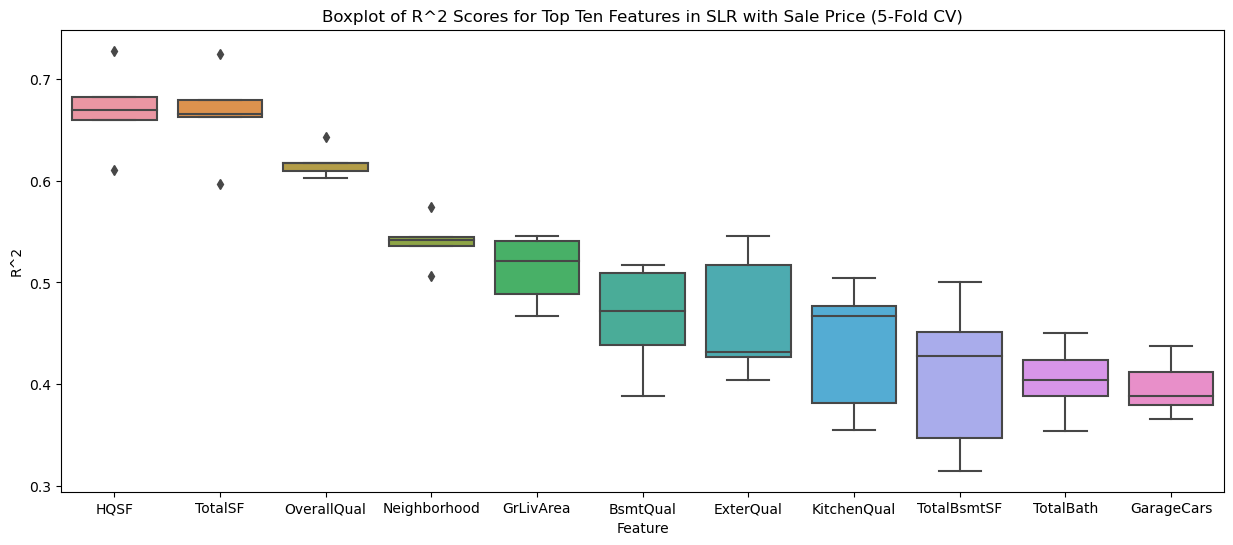

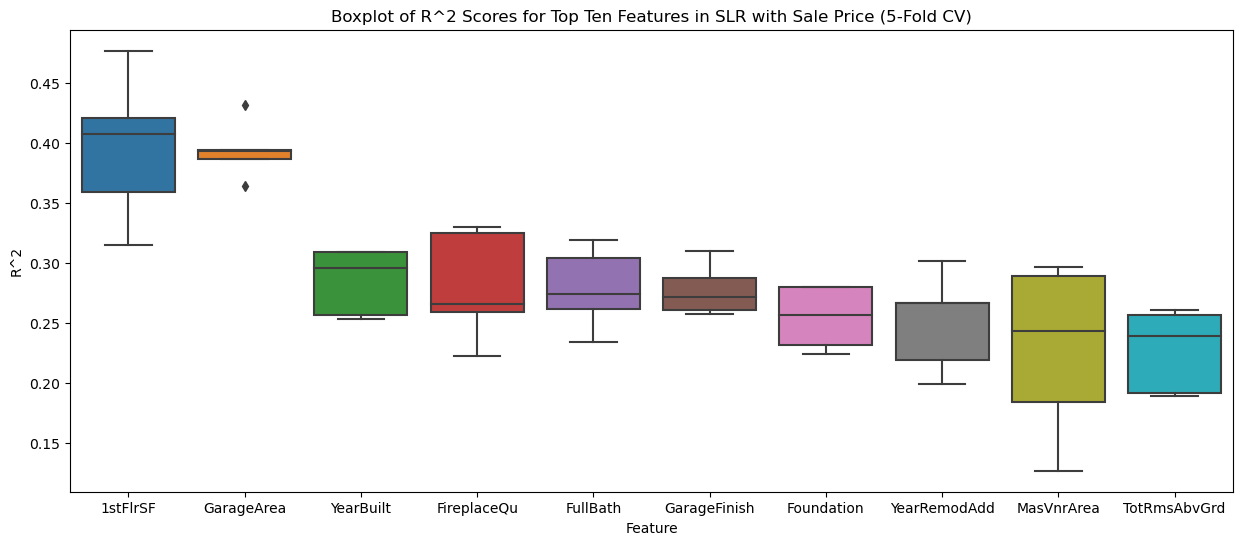

In [108]:
df_long = slr_CV_toplot.melt(id_vars='Feature', var_name='Fold', value_name='R^2')
df_long2 = slr_CV_toplot2.melt(id_vars='Feature', var_name='Fold', value_name='R^2')

plt.figure(figsize=(15, 6))
sns.boxplot(x='Feature', y='R^2', data=df_long)
plt.title('Boxplot of R^2 Scores for Top Ten Features in SLR with Sale Price (5-Fold CV)')
plt.xlabel('Feature')
plt.ylabel('R^2')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Feature', y='R^2', data=df_long2)
plt.title('Boxplot of R^2 Scores for Top Ten Features in SLR with Sale Price (5-Fold CV)')
plt.xlabel('Feature')
plt.ylabel('R^2')
plt.show()

# Multiple Linear Regression
With some clear insight through simple linear regression, the next step is multiple linear regression. I want to combine ~5 of these variables and create a model that is reasonably accurate (R^2 > .73) while still remaining as interpretable as possible. Could you explain the equation on the back of an envelope?

In [109]:
top14 = slr_CV_df['Feature'][:14].tolist()
top14
#Multicollinearity concerns- edit down to
top11 = ['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

In [110]:
#pd.options.display.float_format = '{:.4f}'.format
from itertools import combinations

def my_mlr(subset_list, df):
    
    y = df['SalePrice']
    results_list = []

    for subset in subset_list:
        X = df[subset]

        cat_cols = [col for col in X.columns if X[col].dtype == 'object']

        if cat_cols:
            encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
            transformed_X = encoder.fit_transform(X[cat_cols])
            transformed_X = pd.DataFrame(transformed_X.toarray(), columns=encoder.get_feature_names_out())
            transformed_X.reset_index(drop=True, inplace=True)  # Reset index
            X.reset_index(drop=True, inplace=True)  # Reset index for X as well
            X = pd.concat([X.drop(columns=cat_cols), transformed_X], axis=1)

        model = LinearRegression()
        cv_scores = cross_val_score(model, X, y, cv=5)

        df_list = [subset] + list(cv_scores) + [np.mean(cv_scores), np.std(cv_scores)]
        results_list.append(df_list)
        
        results_list = sorted(results_list, key = lambda x: x[6], reverse = True)

    CV_df = pd.DataFrame(results_list, columns=['Features'] + [f'Fold{i}' for i in range(1, 6)] + ['Avg', 'Std'])

    return CV_df


top11 = ['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
pairs = combinations(top11, 2)
top10_pairings = [list(pair) for pair in pairs]
mlr_2_CV_df = my_mlr(top10_pairings, ames)
mlr_2_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual]",0.7660,0.7900,0.8140,0.7849,0.7791,0.7868,0.0158
1,"[HQSF, Neighborhood]",0.7799,0.7987,0.8134,0.7762,0.7554,0.7847,0.0199
2,"[HQSF, YearBuilt]",0.7340,0.7388,0.7953,0.7040,0.7074,0.7359,0.0327
3,"[HQSF, YearRemodAdd]",0.7167,0.7391,0.7736,0.7150,0.7084,0.7305,0.0239
4,"[OverallQual, 1stFlrSF]",0.7262,0.7299,0.7236,0.7209,0.7072,0.7216,0.0078
5,"[HQSF, GarageCars]",0.7215,0.7129,0.7708,0.7051,0.6818,0.7184,0.0293
6,"[HQSF, GarageArea]",0.7174,0.7117,0.7703,0.7042,0.6697,0.7147,0.0324
7,"[OverallQual, Neighborhood]",0.6857,0.7238,0.7069,0.7367,0.6963,0.7099,0.0184
8,"[OverallQual, TotalBsmtSF]",0.7198,0.7082,0.7054,0.6772,0.6542,0.6930,0.0239
9,"[OverallQual, GarageArea]",0.6801,0.7015,0.6652,0.6989,0.6599,0.6811,0.0169


In [111]:
def cvplot(df):
    toplot1 = df.iloc[:11, 0:6]
    toplot2 = df.iloc[11:21, 0:6]
    
    df_long = toplot1.melt(id_vars='Features', var_name='Fold', value_name='R^2')
    df_long2 = toplot2.melt(id_vars='Features', var_name='Fold', value_name='R^2')

    df_long['Features'] = df_long['Features'].apply(lambda x: ', '.join(map(str, x)))
    df_long2['Features'] = df_long2['Features'].apply(lambda x: ', '.join(map(str, x)))
    
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Features', y='R^2', data=df_long)
    plt.title('Boxplot of R^2 Scores for Top Ten Groupings in MLR with Sale Price (5-Fold CV)')
    plt.xlabel('Features')
    plt.ylabel('R^2')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Features', y='R^2', data=df_long2)
    plt.title('Boxplot of R^2 Scores for Top Ten Groupings in MLR with Sale Price (5-Fold CV)')
    plt.xlabel('Features')
    plt.ylabel('R^2')
    plt.xticks(rotation=45)
    plt.show()

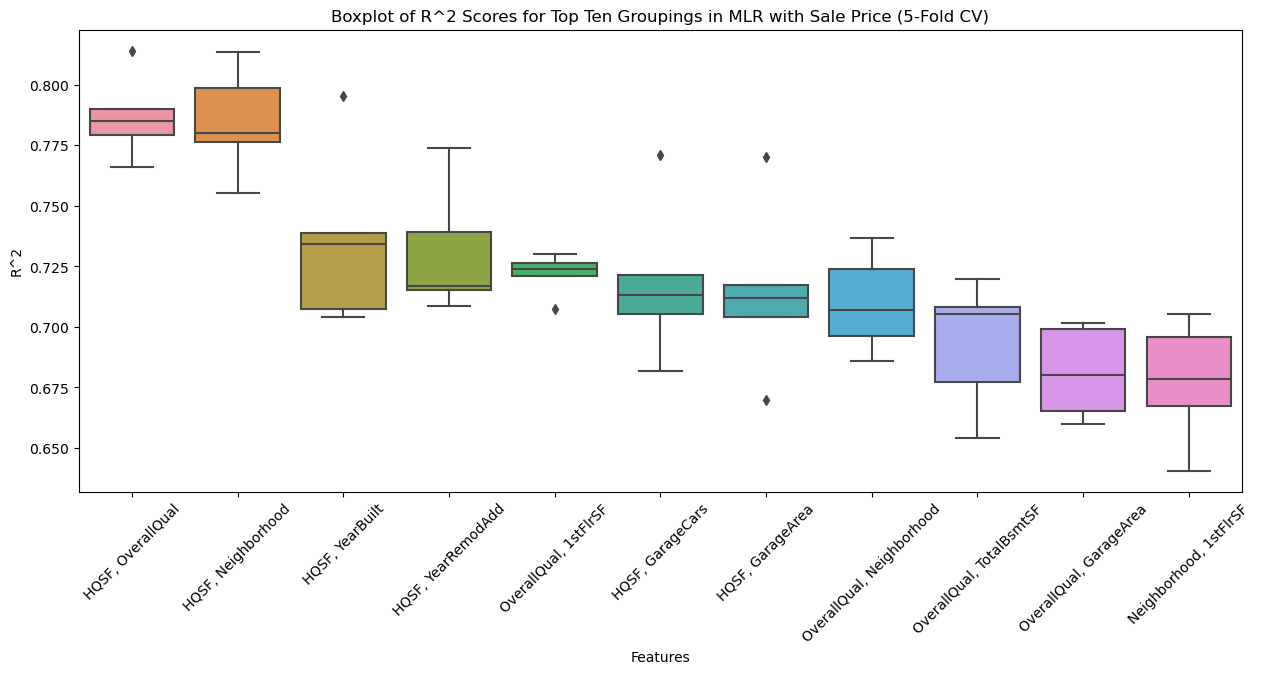

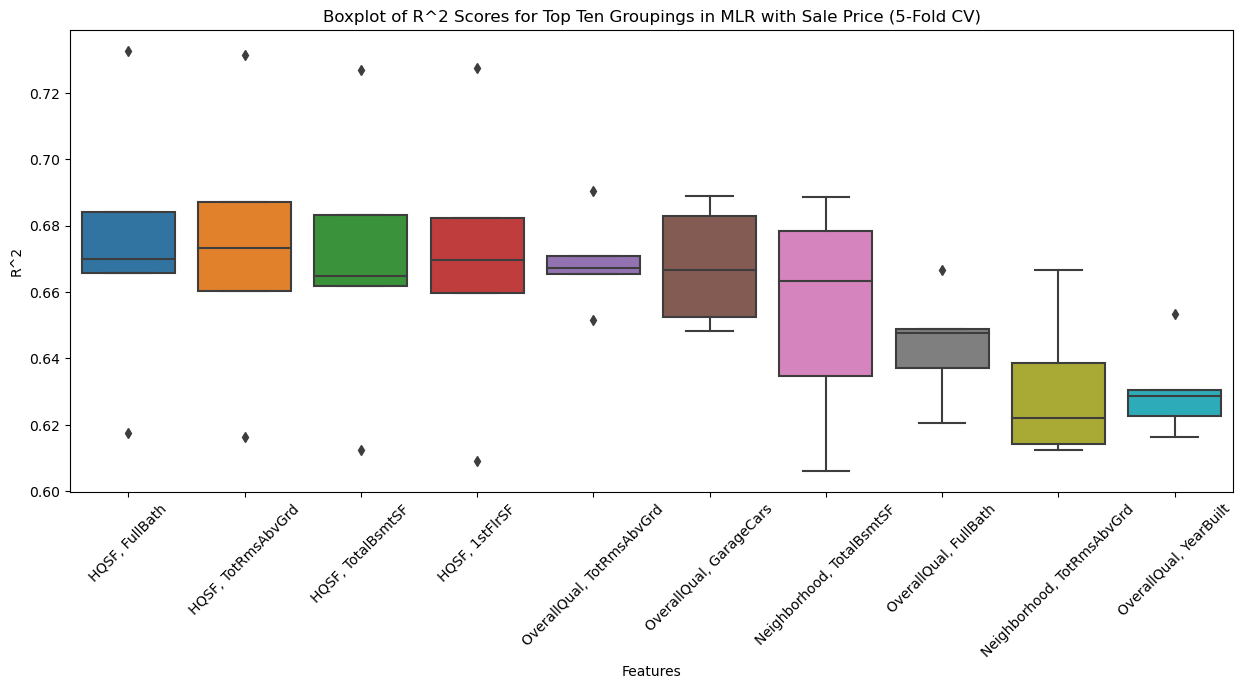

In [112]:
cvplot(mlr_2_CV_df)

In [222]:
for x in range(50):
    print(mlr_2_CV_df.iloc[x, 0])

['HQSF', 'OverallQual']
['HQSF', 'Neighborhood']
['HQSF', 'YearBuilt']
['HQSF', 'YearRemodAdd']
['OverallQual', '1stFlrSF']
['HQSF', 'GarageCars']
['HQSF', 'GarageArea']
['OverallQual', 'Neighborhood']
['OverallQual', 'TotalBsmtSF']
['OverallQual', 'GarageArea']
['Neighborhood', '1stFlrSF']
['HQSF', 'FullBath']
['HQSF', 'TotRmsAbvGrd']
['HQSF', 'TotalBsmtSF']
['HQSF', '1stFlrSF']
['OverallQual', 'TotRmsAbvGrd']
['OverallQual', 'GarageCars']
['Neighborhood', 'TotalBsmtSF']
['OverallQual', 'FullBath']
['Neighborhood', 'TotRmsAbvGrd']
['OverallQual', 'YearBuilt']
['Neighborhood', 'GarageArea']
['OverallQual', 'YearRemodAdd']
['Neighborhood', 'GarageCars']
['Neighborhood', 'FullBath']
['Neighborhood', 'YearRemodAdd']
['GarageCars', 'TotalBsmtSF']
['Neighborhood', 'YearBuilt']
['GarageCars', '1stFlrSF']
['GarageArea', 'TotalBsmtSF']
['1stFlrSF', 'YearRemodAdd']
['GarageArea', '1stFlrSF']
['1stFlrSF', 'YearBuilt']
['TotalBsmtSF', 'YearRemodAdd']
['TotalBsmtSF', 'FullBath']
['TotalBsmtSF', 'T

In [138]:
def mlr_coefs(subset, df):
    
    y = df['SalePrice']
    results_list = []

    X = df[subset]

    cat_cols = [col for col in X.columns if X[col].dtype == 'object']

    if cat_cols:
        encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
        transformed_X = encoder.fit_transform(X[cat_cols])
        transformed_X = pd.DataFrame(transformed_X.toarray(), columns=encoder.get_feature_names_out())
        transformed_X.reset_index(drop=True, inplace=True)  # Reset index
        X.reset_index(drop=True, inplace=True)  # Reset index for X as well
        X = pd.concat([X.drop(columns=cat_cols), transformed_X], axis=1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .2, random_state = 0)
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    r2 = r2_score(Y_test, Y_pred)
    
    print(f'R2: {r2}')
    print(f' coefs: {model.coef_.flatten().tolist()}')
    print(f' intercept: {model.intercept_}')

In [139]:
#Now I can do stuff like this!
for x in range(5):
    print(mlr_2_CV_df.iloc[x,0])
    mlr_coefs(mlr_2_CV_df.iloc[x, 0], ames)    

['HQSF', 'OverallQual']
R2: 0.8010786074405741
 coefs: [51.53028559099342, 23829.16600955244]
 intercept: -95981.33483131166
['HQSF', 'Neighborhood']
R2: 0.7807301411844932
 coefs: [58.007609131395, -6088.735694235802, -31302.99533904086, -30162.989904090227, -4438.500246616127, 3345.7245272255545, 5007.534516106901, -33886.52339211761, 3804.8892418552036, 19440.044069862437, 114229.95353271539, -45514.09692773511, -17197.52844557125, -40206.36762390621, -15500.229732746697, -30301.01067088399, -24786.52323941715, -16794.786966733627, 55930.24685587443, 64270.532443634074, -42526.91034010732, -43584.51520634345, -25844.539659105147, -7559.327167623516, 27210.28927870937, 77203.59973835382, 19552.86484589095, 25071.114878227527]
 intercept: 41082.690639351116
['HQSF', 'YearBuilt']
R2: 0.7413193741184754
 coefs: [69.10630294527654, 690.6294867690373]
 intercept: -1357255.1965383901
['HQSF', 'YearRemodAdd']
R2: 0.7348546501966908
 coefs: [70.69858453438134, 936.8560693393258]
 intercept: 

In [140]:
#or, select from these top pairings to see how their coefficients change, go for interpretability.
#Ditch all with 'OverallQual'
trimmed_list = []
for x in range(50):
    top_pair= mlr_2_CV_df.iloc[x, 0]
    if 'OverallQual' not in top_pair:
        trimmed_list.append(top_pair)        

In [141]:
for subset in trimmed_list:
    print(subset)
    mlr_coefs(subset, ames)   

['HQSF', 'Neighborhood']
R2: 0.7807301411844932
 coefs: [58.007609131395, -6088.735694235802, -31302.99533904086, -30162.989904090227, -4438.500246616127, 3345.7245272255545, 5007.534516106901, -33886.52339211761, 3804.8892418552036, 19440.044069862437, 114229.95353271539, -45514.09692773511, -17197.52844557125, -40206.36762390621, -15500.229732746697, -30301.01067088399, -24786.52323941715, -16794.786966733627, 55930.24685587443, 64270.532443634074, -42526.91034010732, -43584.51520634345, -25844.539659105147, -7559.327167623516, 27210.28927870937, 77203.59973835382, 19552.86484589095, 25071.114878227527]
 intercept: 41082.690639351116
['HQSF', 'YearBuilt']
R2: 0.7413193741184754
 coefs: [69.10630294527654, 690.6294867690373]
 intercept: -1357255.1965383901
['HQSF', 'YearRemodAdd']
R2: 0.7348546501966908
 coefs: [70.69858453438134, 936.8560693393258]
 intercept: -1858996.9200185314
['HQSF', 'GarageCars']
R2: 0.7233593611179989
 coefs: [64.64509436223474, 26637.53345643878]
 intercept: 

R2: 0.46703676026443797
 coefs: [53622.328549584934, 14683.111188800582]
 intercept: -9581.181287821324
['GarageArea', 'YearBuilt']
R2: 0.517539366554021
 coefs: [171.31606994419676, 806.1562526218489]
 intercept: -1490833.937478632
['1stFlrSF', 'TotRmsAbvGrd']
R2: 0.45529917989698565
 coefs: [104.50079730612964, 14233.831208108453]
 intercept: -32664.31967627583
['GarageCars', 'FullBath']
R2: 0.464912501092527
 coefs: [50688.097963605454, 39916.056904252255]
 intercept: 27464.08358401904
['GarageCars', 'YearBuilt']
R2: 0.4681938491986929
 coefs: [49867.99147524001, 699.6787716031014]
 intercept: -1287980.1736567132
['TotalBsmtSF', '1stFlrSF']
R2: 0.45023256505483367
 coefs: [68.16999122245197, 67.10465701456172]
 intercept: 30476.86165234499
['GarageCars', 'GarageArea']
R2: 0.42985537907941485
 coefs: [41929.61121599451, 92.56289502423675]
 intercept: 61327.28937528544


### Three Variables

In [113]:
top11 = ['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
trips = combinations(top11, 3)
top11_trips = [list(trip) for trip in trips]
mlr_3_CV_df = my_mlr(top11_trips, ames)
mlr_3_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual, Neighborhood]",0.8032,0.8283,0.8425,0.8333,0.8167,0.8248,0.0137
1,"[HQSF, OverallQual, GarageArea]",0.7829,0.8012,0.8252,0.8059,0.7928,0.8016,0.0142
2,"[HQSF, Neighborhood, GarageArea]",0.7925,0.8059,0.8274,0.7958,0.7733,0.7990,0.0177
3,"[HQSF, OverallQual, YearBuilt]",0.7797,0.7990,0.8258,0.7924,0.7971,0.7988,0.0151
4,"[HQSF, OverallQual, GarageCars]",0.7796,0.7965,0.8222,0.8030,0.7919,0.7987,0.0140
5,"[HQSF, Neighborhood, YearRemodAdd]",0.7860,0.8126,0.8263,0.7879,0.7800,0.7986,0.0178
6,"[HQSF, OverallQual, YearRemodAdd]",0.7741,0.8008,0.8225,0.7921,0.7979,0.7975,0.0156
7,"[HQSF, Neighborhood, GarageCars]",0.7907,0.8039,0.8251,0.7911,0.7730,0.7968,0.0173
8,"[HQSF, Neighborhood, YearBuilt]",0.7848,0.8069,0.8229,0.7779,0.7678,0.7921,0.0201
9,"[HQSF, OverallQual, 1stFlrSF]",0.7688,0.7911,0.8140,0.7893,0.7793,0.7885,0.0150


In [114]:
pd.set_option('display.max_rows', 500)
mlr_3_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual, Neighborhood]",0.8032,0.8283,0.8425,0.8333,0.8167,0.8248,0.0137
1,"[HQSF, OverallQual, GarageArea]",0.7829,0.8012,0.8252,0.8059,0.7928,0.8016,0.0142
2,"[HQSF, Neighborhood, GarageArea]",0.7925,0.8059,0.8274,0.7958,0.7733,0.7990,0.0177
3,"[HQSF, OverallQual, YearBuilt]",0.7797,0.7990,0.8258,0.7924,0.7971,0.7988,0.0151
4,"[HQSF, OverallQual, GarageCars]",0.7796,0.7965,0.8222,0.8030,0.7919,0.7987,0.0140
5,"[HQSF, Neighborhood, YearRemodAdd]",0.7860,0.8126,0.8263,0.7879,0.7800,0.7986,0.0178
6,"[HQSF, OverallQual, YearRemodAdd]",0.7741,0.8008,0.8225,0.7921,0.7979,0.7975,0.0156
7,"[HQSF, Neighborhood, GarageCars]",0.7907,0.8039,0.8251,0.7911,0.7730,0.7968,0.0173
8,"[HQSF, Neighborhood, YearBuilt]",0.7848,0.8069,0.8229,0.7779,0.7678,0.7921,0.0201
9,"[HQSF, OverallQual, 1stFlrSF]",0.7688,0.7911,0.8140,0.7893,0.7793,0.7885,0.0150


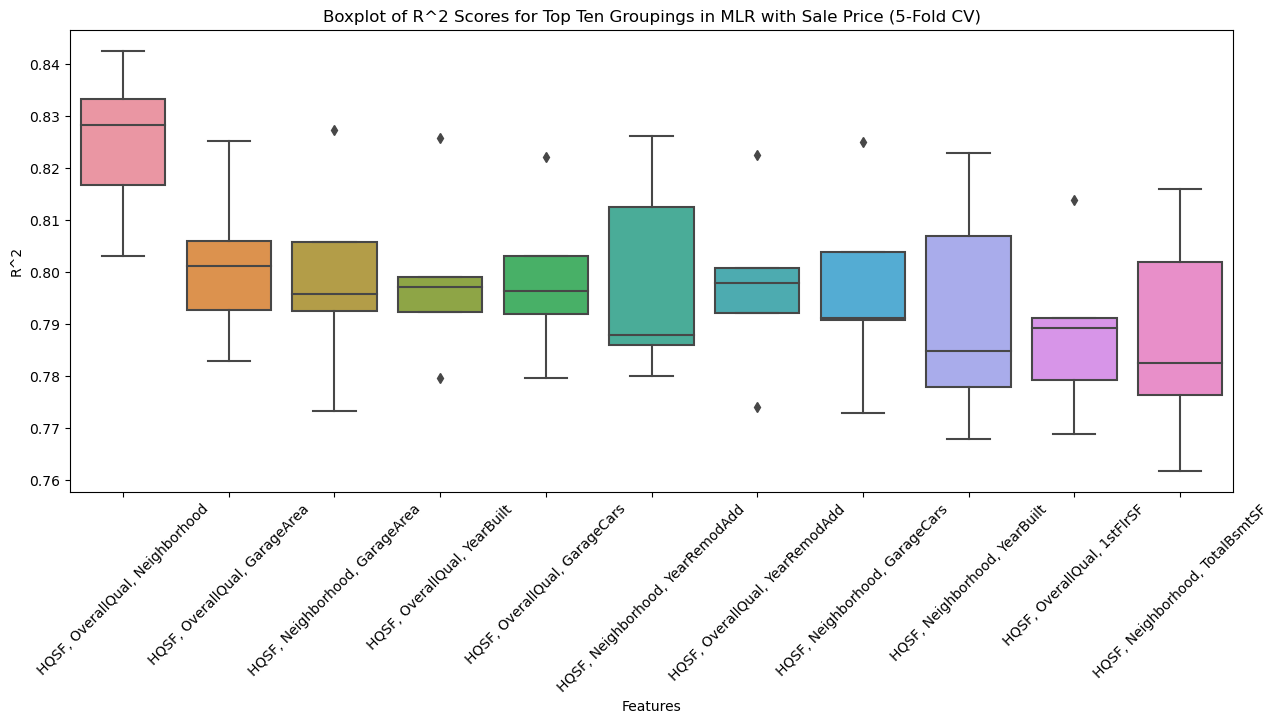

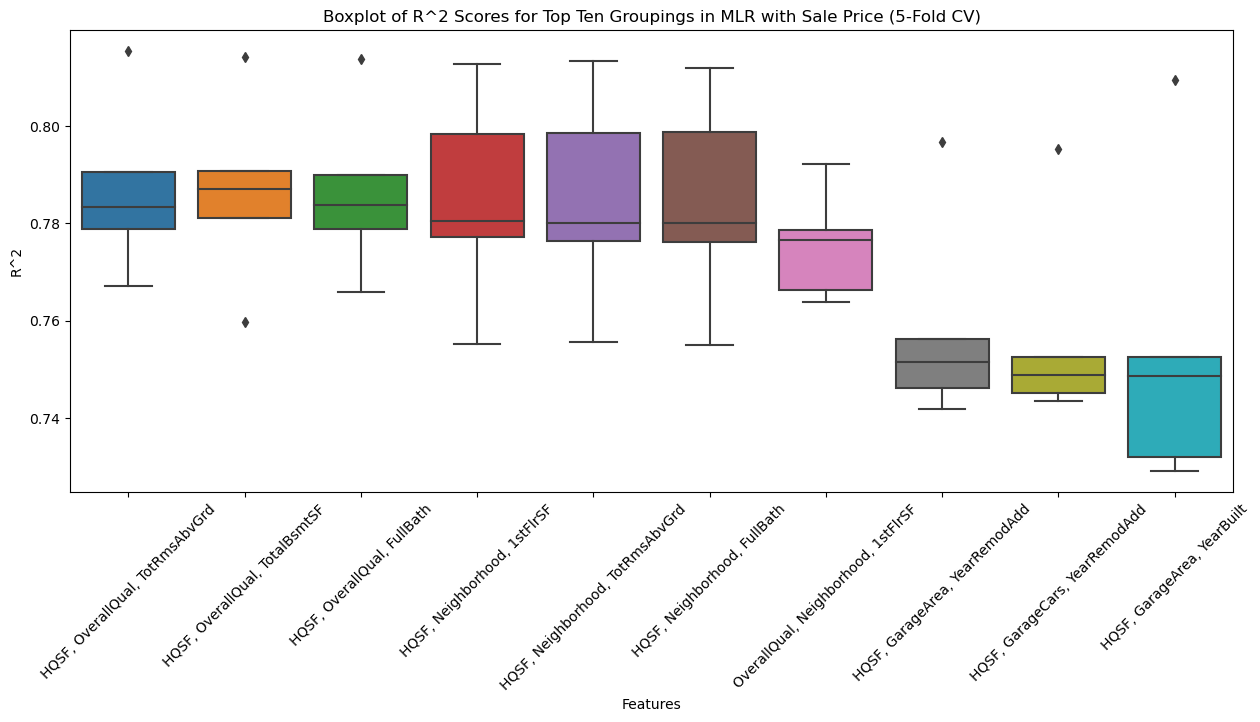

In [115]:
cvplot(mlr_3_CV_df)

### Four Variables

In [116]:
top11 = ['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
quads = combinations(top11, 4)
top11_quads = [list(quad) for quad in quads]
mlr_4_CV_df = my_mlr(top11_quads, ames)
mlr_4_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual, Neighborhood, GarageArea]",0.8119,0.8350,0.8494,0.8469,0.8253,0.8337,0.0139
1,"[HQSF, OverallQual, Neighborhood, GarageCars]",0.8093,0.8322,0.8476,0.8426,0.8238,0.8311,0.0137
2,"[HQSF, OverallQual, Neighborhood, YearRemodAdd]",0.8057,0.8351,0.8479,0.8341,0.8257,0.8297,0.0139
3,"[HQSF, OverallQual, Neighborhood, YearBuilt]",0.8049,0.8317,0.8451,0.8325,0.8208,0.8270,0.0135
4,"[HQSF, OverallQual, Neighborhood, TotalBsmtSF]",0.7983,0.8306,0.8441,0.8377,0.8224,0.8266,0.0159
5,"[HQSF, OverallQual, Neighborhood, 1stFlrSF]",0.8045,0.8280,0.8423,0.8357,0.8173,0.8256,0.0134
6,"[HQSF, OverallQual, Neighborhood, TotRmsAbvGrd]",0.8031,0.8282,0.8425,0.8331,0.8166,0.8247,0.0137
7,"[HQSF, OverallQual, Neighborhood, FullBath]",0.8037,0.8286,0.8415,0.8324,0.8166,0.8246,0.0131
8,"[HQSF, Neighborhood, GarageArea, YearRemodAdd]",0.7984,0.8204,0.8369,0.8088,0.7964,0.8122,0.0150
9,"[HQSF, OverallQual, GarageArea, YearRemodAdd]",0.7886,0.8100,0.8312,0.8129,0.8092,0.8104,0.0135


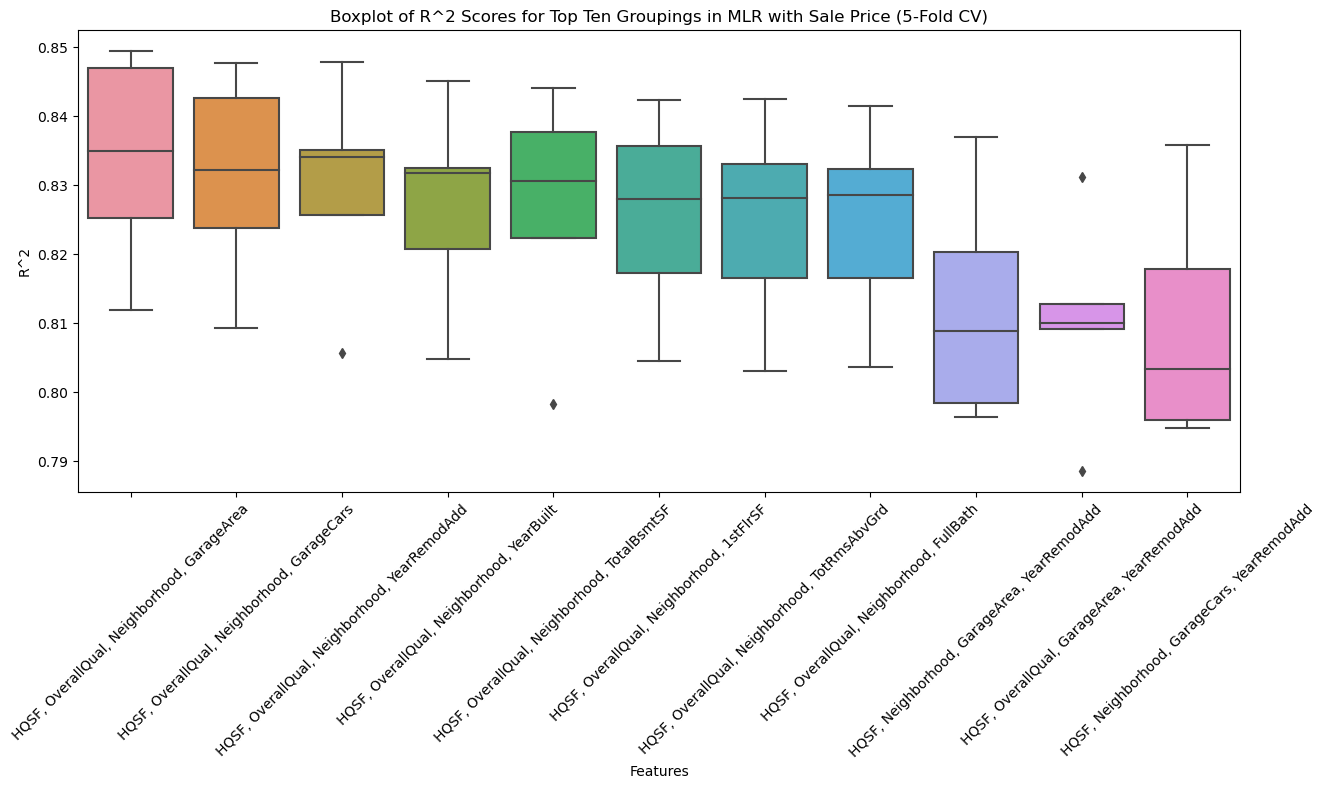

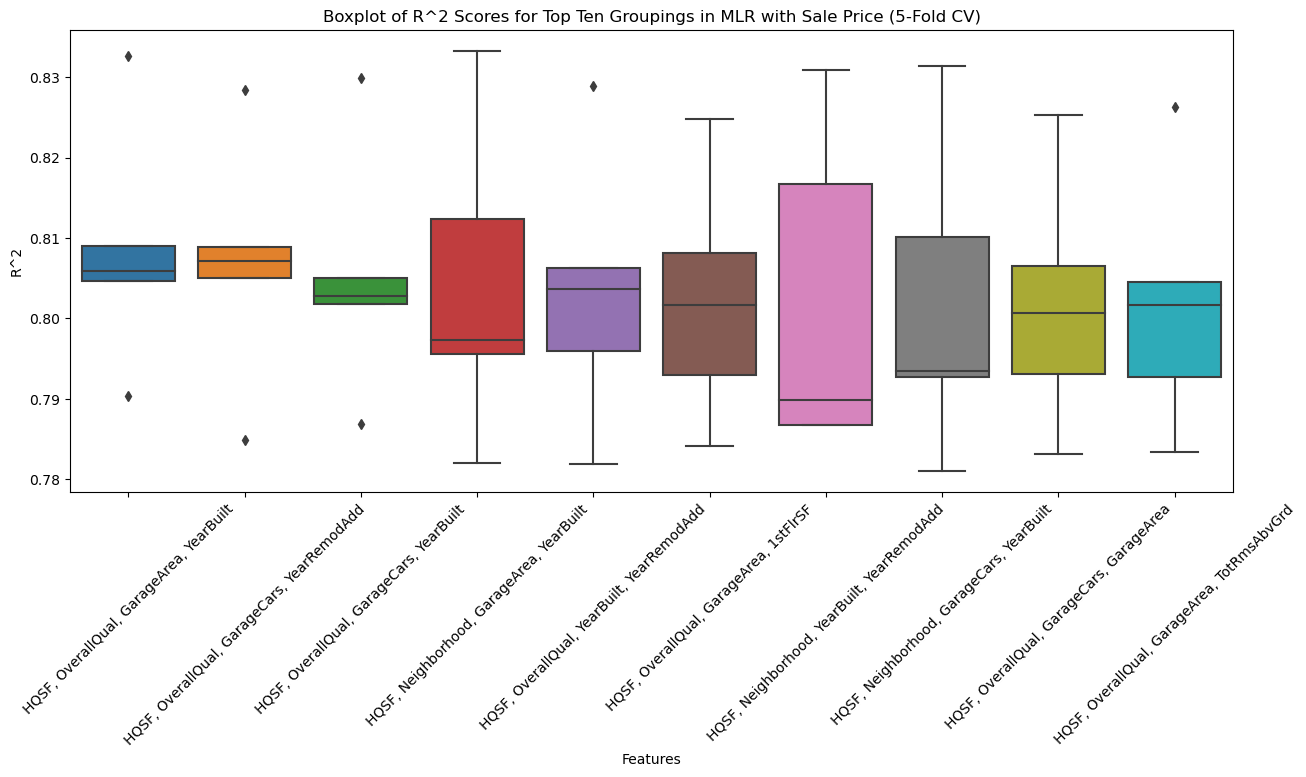

In [117]:
cvplot(mlr_4_CV_df)

### Five Variables?

In [118]:
top11 = ['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
quints = combinations(top11, 5)
top11_quints = [list(quint) for quint in quints]
mlr_5_CV_df = my_mlr(top11_quints, ames)
mlr_5_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual, Neighborhood, GarageArea, ...",0.8146,0.8421,0.8536,0.8489,0.8343,0.8387,0.0137
1,"[HQSF, OverallQual, Neighborhood, GarageCars, ...",0.8118,0.8390,0.8525,0.8441,0.8323,0.8359,0.0138
2,"[HQSF, OverallQual, Neighborhood, GarageArea, ...",0.8128,0.8374,0.8508,0.8463,0.8282,0.8351,0.0136
3,"[HQSF, OverallQual, Neighborhood, GarageArea, ...",0.8076,0.8371,0.8504,0.8498,0.8300,0.8350,0.0157
4,"[HQSF, OverallQual, Neighborhood, GarageArea, ...",0.8125,0.8344,0.8492,0.8483,0.8256,0.8340,0.0139
5,"[HQSF, OverallQual, Neighborhood, GarageArea, ...",0.8129,0.8352,0.8487,0.8468,0.8252,0.8337,0.0135
6,"[HQSF, OverallQual, Neighborhood, GarageCars, ...",0.8119,0.8350,0.8494,0.8469,0.8253,0.8337,0.0139
7,"[HQSF, OverallQual, Neighborhood, GarageArea, ...",0.8119,0.8349,0.8494,0.8468,0.8252,0.8336,0.0139
8,"[HQSF, OverallQual, Neighborhood, GarageCars, ...",0.8102,0.8346,0.8493,0.8419,0.8265,0.8325,0.0135
9,"[HQSF, OverallQual, Neighborhood, GarageCars, ...",0.8048,0.8339,0.8487,0.8453,0.8281,0.8322,0.0156


In [121]:
for x in range(50):
    print(mlr_5_CV_df.iloc[x, 0])

['HQSF', 'OverallQual', 'Neighborhood', 'GarageArea', 'YearRemodAdd']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'YearRemodAdd']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageArea', 'YearBuilt']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageArea', 'TotalBsmtSF']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageArea', '1stFlrSF']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageArea', 'FullBath']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'GarageArea']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageArea', 'TotRmsAbvGrd']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'YearBuilt']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'TotalBsmtSF']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', '1stFlrSF']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'FullBath']
['HQSF', 'OverallQual', 'Neighborhood', 'TotalBsmtSF', 'YearRemodAdd']
['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'TotRmsAbvGrd']
['HQSF', 'OverallQual', 'Neighborhood', 'Year

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

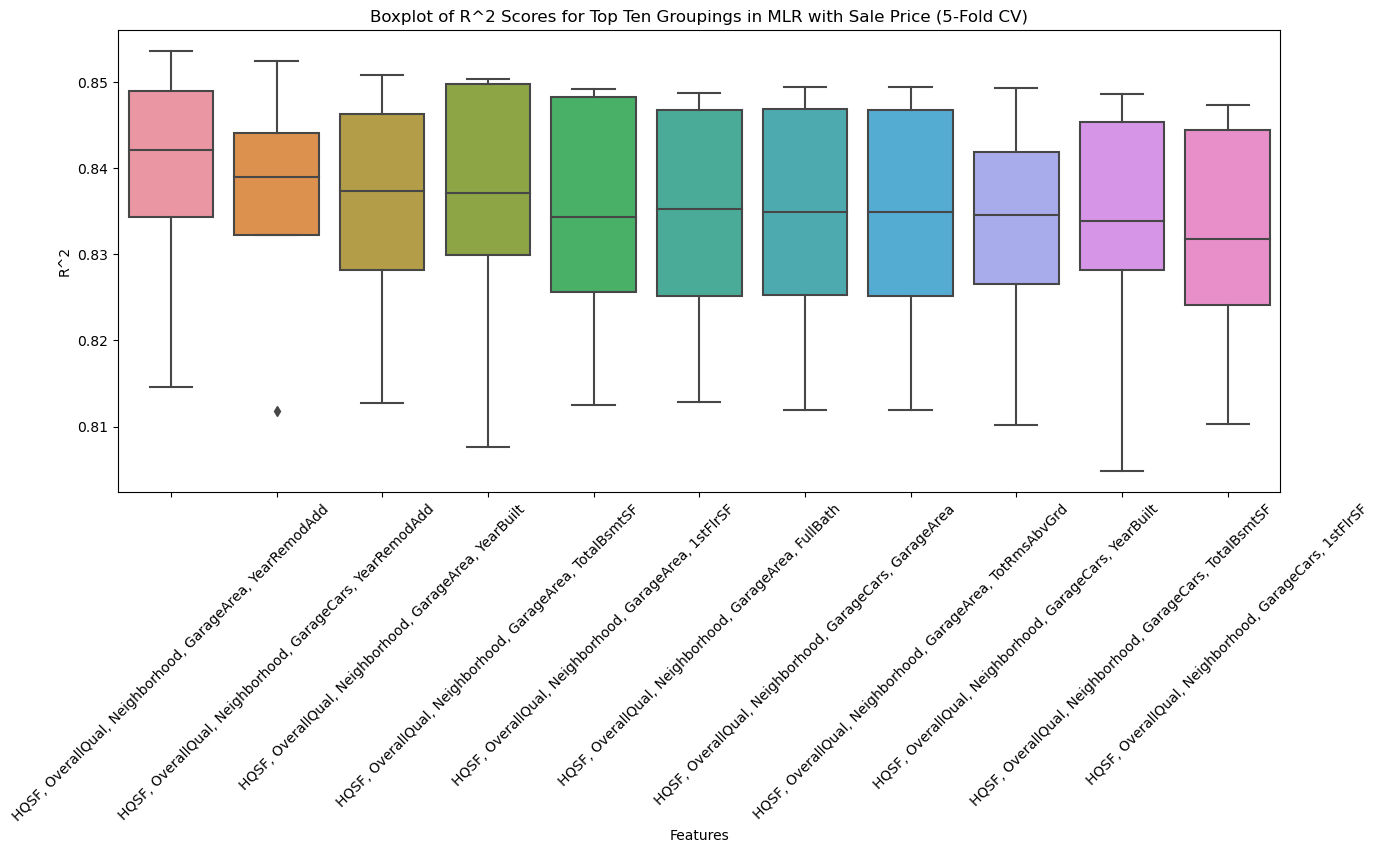

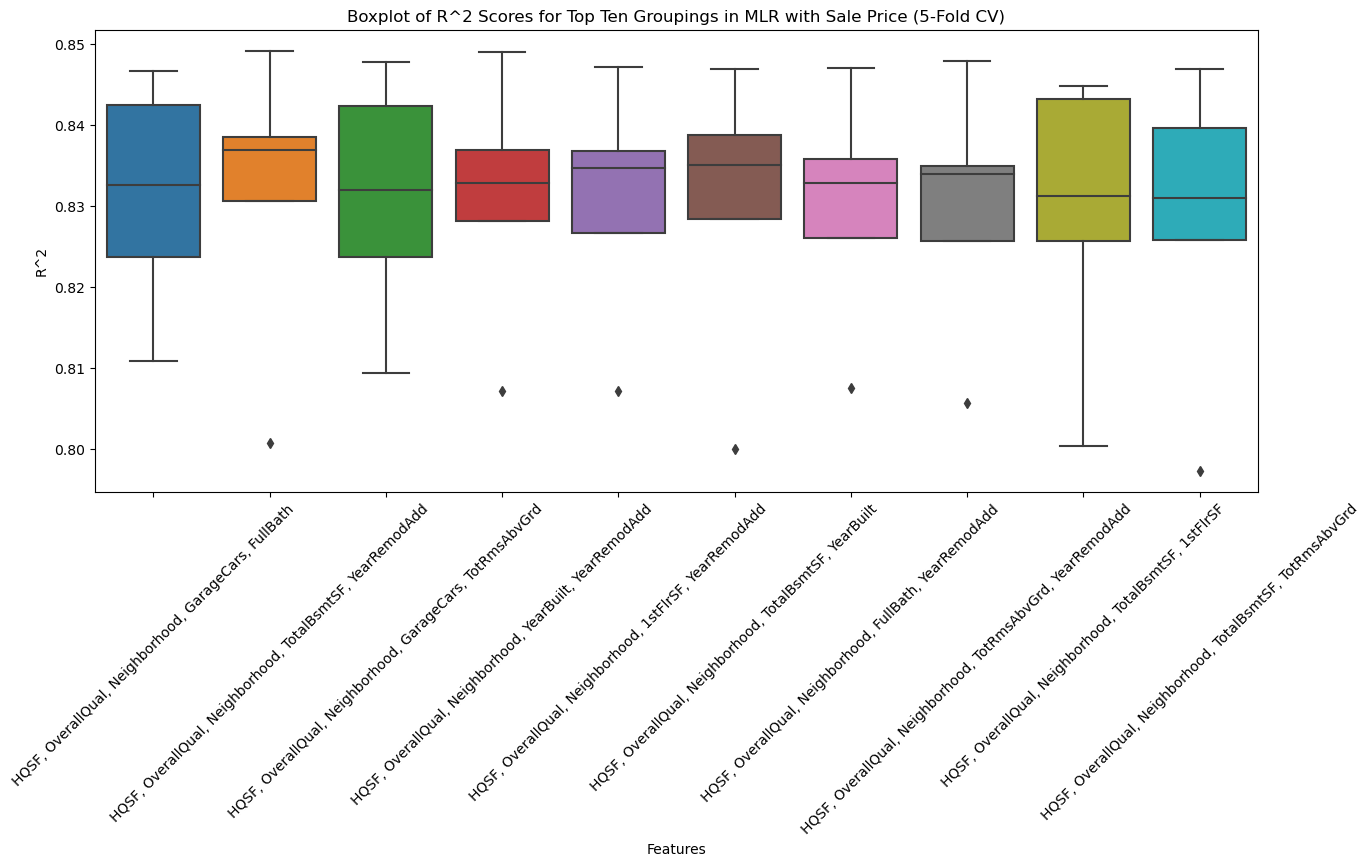

In [91]:
cvplot(mlr_5_CV_df)